# 주의사항
---
아래 코드는 코딩 테스트 문제 해결에 도움을 주기 위해 구현된 코드입니다.  
딥러닝 코딩에 익숙하지 않거나, 중간 중간에 나오는 파이썬 내장 함수들에 익숙하지 않은 벗들을 위해 두 가지 이정표를 마련해두었습니다.  
 - 👆  : 위 코드에 사용된 파이썬/딥러닝 개념
 - 📌  : 생각해보면 좋은 딥러닝 구현 인사이트/개념  

이 이정표가 모든 정보를 담고 있진 않기에, 공부의 편의성을 향상시키기 위한 도구 정도로만 봐주시면 됩니다.  


# Fashion MNIST를 학습하기
---
## 데이터 셋에 대하여
`Fashion MNIST`는 28x28 크기의 흑백 의류 사진으로 이루어진 데이터 셋으로, 2017년에 공개되었습니다.  
대표적인 이미지 분류 데이터 셋인 MNIST보단 복잡도가 높습니다.  
MNIST 데이터셋과 마찬가지로 10개의 라벨이 존재합니다.



본 예제는 `pytorch.vision`에서 데이터셋을 받아와 사용합니다.   

---

아래 코드는 파이토치 공식 문서의 예제를 이용해 구현되었습니다.  
공식 문서를 참고하실 분들을 위해 링크를 걸어두겠습니다.  
[파이토치 예제 공식 문서](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

# Import

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 처리 관련
import random
import numpy as np
import pandas as pd

# 파이토치 관련
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

## load Dataset

데이터를 로드하고 학습용, 테스트용으로 나누는 과정.

1. root: 데이터를 저장할 로컬 경로
2. train=True/False: 학습용/테스트용 구분
3. download=True 데이터를 자동으로 다운로드할지 여부
4. transform=ToTensor() 데이터를 PyTorch 텐서로 변환

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.8MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.0MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# label classes

| 레이블 값 |	의미 |
|---|---|
|0	|T-shirt/top|
|1	|Trouser|
|2|	Pullover|
|3	|Dress|
|4	|Coat|
|5	|Sandal|
|6	|Shirt|
|7	|Sneaker|
|8	|Bag|
|9	|Ankle boot|


FashionMNIST 데이터셋을 로드하면 레이블은 정수(0~9)형태로 표현됨.

레이블을 사람이 읽기 편하도록 실제 클래스 이름으로 변환하는 과정.

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

##  인풋 데이터 시각화
---
시각화는 학습에 이용되는 데이터에 문제가 있는지 확인하는 쉽지만 강력한 방법이다.  
random 라이브러리를 사용해 무작위로 데이터를 꺼내 시각화했다.

In [ ]:
training_data[0][0].shape # 데이터 셋의 데이터 dim : (Channel, Height, Width)

torch.Size([1, 28, 28])

FashionMNIST 이미지는 PyTorch 텐서 형태로 저장됨: (Channel, Height, Width)


Matplotlib에서 이미지를 그릴 땐 (Height, Width, Channel) 형식이 필요.
 -> permute()를 이용해 차원 순서를 변경.

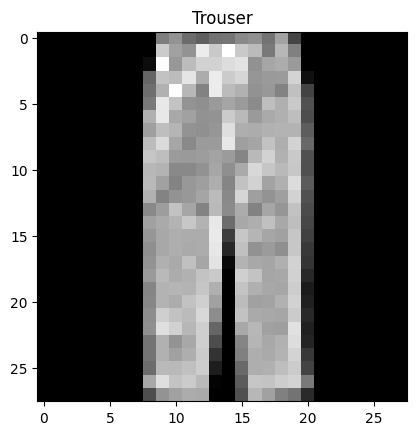

In [ ]:
# 랜덤으로 인덱스를 뽑는다.
idx = random.randint(0,len(training_data))

# 해당 인덱스에서 이미지와 라벨 추출하기
img, label = training_data[idx]

# 이미지의 데이터 차원 순서 변경
img = img.permute(1,2,0) # 이미지의 데이터 dim : (Height, Width, Channel)

# 랜덤 이미지 출력
plt.imshow(img, cmap='gray')
plt.title(classes[int(label)])
plt.show()

#### + 추가적인 데이터 품질 확인

In [ ]:
# 각 클래스별 샘플 수 확인

all_labels = [label for _, label in training_data]
unique, counts = np.unique(all_labels, return_counts=True)

for u, c in zip(unique, counts):
    print(f"{classes[u]}: {c} images")

T-shirt/top: 6000 images
Trouser: 6000 images
Pullover: 6000 images
Dress: 6000 images
Coat: 6000 images
Sandal: 6000 images
Shirt: 6000 images
Sneaker: 6000 images
Bag: 6000 images
Ankle boot: 6000 images


Image Tensor Shape: torch.Size([1, 28, 28])
Label: 9
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
    

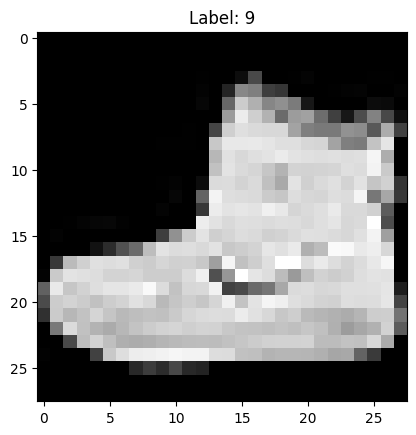

In [ ]:
# 첫 번째 이미지와 레이블 가져오기
img, label = training_data[0]

# 텐서 형태 출력
print(f"Image Tensor Shape: {img.shape}")  # (1, 28, 28)
print(f"Label: {label}")  # 정수형 클래스 인덱스 (0~9)

# 텐서 내용 일부 확인
print(img)

# 이미지 시각화
plt.imshow(img.squeeze(), cmap="gray")  # squeeze()로 (28, 28)로 변환
plt.title(f"Label: {label}")
plt.show()

- 배열의 각 원소는 이미지 하나의 픽셀을 가리킴. 또한 0~255 사이의 값을 가짐. (값이 실수인 이유는 정규화를 거쳤기 때문)
- 예를 들어, 모든 값이 0을 가진 배열은 완전히 "검은색"인 픽셀을 의미함.
- 보통 흑백 이미지는 2D 텐서로 표현됨.

## make DataLoader

DataLoader는 PyTorch에서 데이터를 배치 단위로 모델에 공급하기 위해 사용하는 도구임.

-> 모델 학습에 필요한 **데이터 서빙** 역할

In [ ]:
# 배치 사이즈 지정 (= 64개씩 데이터 끊어서 모델에 공급)
batch_size = 64

# 학습용, 테스트용 데이터로더 생성하기
trainloader = DataLoader(training_data, batch_size=batch_size)
testloader = DataLoader(test_data, batch_size=batch_size)

# 데이터로더에서 배치를 하나 꺼내서 확인하는 코드
for X, y in testloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


**출력 형태**

1. X는 이미지 배치를 의미함.

  FashionMNIST는 흑백 이미지 -> PyTorch에서 (N, C, H, W) 형태로 저장된다.

  N (batch size): 한 번에 몇 개의 데이터를 꺼내왔는지 (64)
  
  C (channel): 이미지 채널 수 -> 흑백 (1채널)
  
  H (height): 이미지 높이 (28 픽셀)
  
  W (width): 이미지 너비 (28 픽셀)
  <br>

2. y는 레이블 배치를 의미함. (이미지의 정답 클래스)
  
  길이가 64인 1차원 텐서, 64비트 정수형 데이터타입


## 신경망 정의하기

### **📌 신경망의 input, output dimension에 대해 생각해보기**

#### **입력 차원 (Input Dimension)**

##### 1. 입력 데이터의 형태
- 신경망에 입력되는 데이터는 텐서(tensor) 형태로 주어짐. 텐서는 다차원 배열을 의미함.
- FashionMNIST는 28*28 크기의 흑백 이미지임.
- 따라서 입력 차원은 (batch_size, height, width) -> (64, 28, 28)로 표현될 수 있음. (흑백이므로 채널 차원은 생략)
- [텐서 개념](https://blog.naver.com/wooy0ng/222601436313)은 이 블로그 게시글을 통해 이해하였음.

##### 2. Flatten의 역할
- 신경망은 벡터 형태로 입력 데이터를 처리해야함. 즉, 각 이미지 입력을 1D 벡터로 변환해야 함.
- Flatten은 (28, 28) 형태의 2D 배열을 "크기가 784인 1D 벡터"로 변환하는 역할을 함.
- 변환된 벡터는 이후 Fully Connected Layer(선형 계층)에 입력값으로 들어감.

##### 3. Fully Connected Layer의 동작
- Fully Connected Layer는 입력 벡터에 대해 선형 변환을 수행한다.
- 예를 들어 nn.Linear(784, 512)는 입력 벡터를 512 차원의 출력 벡터로 변환함. (선형 방식으로 이루어짐)
- 그러나 단순히 선형 변환으로는 복잡한 데이터 패턴을 학습할 수 없기 때문에 "활성화 함수"를 사용하여 비선형성을 추가함.

##### 4. Activation Function이란
- 선형 변환만 하면 모델이 단순해져서 복잡한 패턴을 학습하지 못하기 때문에, 활성화 함수가 필요함.
- 예를 들어 ReLU는 입력값이 0보다 크면 그대로 출력하고, 0 이하일 때는 0으로 출력함.
- 그 외에도 sigmoid나 tanh같은 활성화 함수도 있음.

<br>

#### **출력 차원 (Output Dimension)**

##### 1. 입출력 차원의 일치
- 모든 레이어에서 다음 레이어의 입력 차원은 직전에 계산된 출력 차원과 반드시 일치해야함. 차원이 맞지 않으면 오류 발생.
- 예를 들어서, nn.Linear(512, 512)의 출력 차원인 512 차원은 다음 레이어에서 512 차원의 입력을 받아야 오류가 발생하지 않음.

##### 2. 모델의 최종 출력 차원
- 최종 출력 차원은 분류해야하는 클래스의 수와 일치해야함.
- 예를 들어, 10개의 클래스를 분류하는 문제는 출력 차원이 10이어야 함.
- nn.Linear(512, 10)는 마지막 출력 레이어이기 때문에 출력이 10차원인 벡터로 결정됨. 각 차원은 각각의 클래스에 해당하는 raw score(logits)를 나타냄. (이를 확률로 변환하려면 소프트맥스를 적용해야 함)
- 예를 들어 출력이 [0.1, 0.5, 0.2, 0.05, 0.05, 0.1, 0.0, 0.0, 0.0, 0.0]이라면, 이 모델은 2번째 클래스를 가장 확률 높게 예측한 것임.

<br>

**+ 소프트맥스를 통한 정규화가 필요한 이유**
- 모델이 각 클래스에 대해 예측한 “상대적인 점수(logit)“를 확률로 변환하기 위함.
- 소프트맥스는 각 클래스의 점수를 0~1 사이 값으로 정규화하고, 전체 확률의 합이 1이 되게 함.
- 예를 들어, 소프트맥스를 적용하기 전에 logits가 [2.0, 1.0, 0.1]이라면, 소프트맥스는 이 값을 확률로 변환하여 [0.66, 0.33, 0.01]처럼 만들어 주고, 이 확률들의 합은 1이 됨.
- 확률 표현을 통해 클래스에 대한 예측 확신도를 직관적으로 비교 가능함.

In [ ]:
# 모델을 어디에서 학습시킬지 정하는 코드
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" # Apple M1/M2 GPU
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device\n")

# 신경망 class 정의 (nn.Module 상속)
class NeuralNetwork(nn.Module):
    def __init__(self): # 클래스 생성자 함수
        super().__init__()          # 부모 클래스(nn.Module)의 생성자 호출
        self.flatten = nn.Flatten() # 이미지를 1차원 벡터로 펼치기 28x28 -> 784

        # 선형 계층 + ReLU 활성화 함수
        self.linear_relu_stack = nn.Sequential( # 여러 레이어를 순서대로 쌓음
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    # 순전파 정의
    def forward(self, x):
        x = self.flatten(x) # x 형태는 (64, 784)
        logits = self.linear_relu_stack(x)
        return logits # 마지막 레이어에서 계산된 값 (10차원 벡터 반환)

# 정의한 신경망 클래스를 인스턴스화, 모델을 원하는 디바이스로 이동
model = NeuralNetwork().to(device)
print(model) # 모델 출력

Using cuda device

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


- bias=True 인자는 편향을 뜻함. (y = W*x + b에서 b)

- 출력값에 추가적인 자유도를 부여하여 모델이 더 유연하게 학습할 수 있게 만듦.

# 옵티마이저, 손실 함수 정의

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

#### 1. 손실 함수
- CrossEntropyLoss()는 다중 클래스 분류 문제에서 자주 사용되는 손실 함수임. 소프트맥스와 로그 손실을 결합한 형태.

- 원-핫 인코딩(정답을 1로 표기하고 나머지는 0으로 표기한 벡터)된 실제 값과 모델이 예측한 확률을 비교하여 손실을 계산함.

#### 2. 옵티마이저
- 옵티마이저는 손실함수에서 계산된 기울기를 이용해 모델의 가중치를 업데이트함.

- torch.optim.SGD는 확률법 경사 하강법(Stochastic Gradient Descent)를 사용하는 옵티마이저임.

- model.parameters()는 옵티마이저가 업데이트해야 할 모델의 파라미터들을 제공하는 인자임.

- lr=1e-3는 학습률을 의미함. 학습률은 모델이 가중치를 얼마나 빠르게 업데이트할지를 결정하는 하이퍼파라미터를 의미함.

# 모델 학습, test

In [ ]:
EPOCH = 10

# 각 에포크마다 평균 손실과 정확도를 저장할 수 있는 배열 만들기
train_arr = np.zeros((EPOCH,2)) # (ave_loss, acc)
test_arr = np.zeros((EPOCH,2))  # (ave_loss, acc)

for i in range(EPOCH):

    # 모델을 학습 모드로 전환
    model.train()

    total_loss, cnt = 0, 0 # 손실, 카운트 초기화

    # 학습 데이터 배치 단위로 불러오는 루프
    for batch_idx, (x,y) in enumerate(trainloader):

        # 모델과 데이터 장치에 올리기
        x,y = x.to(device), y.to(device)

        # 순전파(Forward propagation)
        y_est = model(x)

        # 손실 계산
        cost = loss(y_est, y) # 손실 함수는 미리 정의한 nn.CrossEntropyLoss()
        total_loss += cost.item() # 손실 누적 (.item()으로 텐서 -> 파이썬 숫자 변환)

        # 역전파(Back propagation)
        optimizer.zero_grad() # 그래디언트 초기화
        cost.backward() # 그래디언트 계산
        optimizer.step() # 가중치 업데이트

        # 정확도 계산
        pred = torch.argmax(y_est, dim=1) # 예측값에서 가장 높은 확률을 갖는 클래스 찾기
        cnt += (pred == y).sum().item() # 정답 개수 누적

    # 평균 손실과 정확도 계산
    acc = cnt / len(training_data)
    ave_loss = total_loss / len(training_data)

    # 평균 손실과 정확도를 배열에 업데이트
    train_arr[i,:] = (ave_loss, acc)

    # 학습 결과 출력
    if i % 1 == 0:
        print('-------------------------------------------')
        print(f"Epoch {i+1} [ Train ] loss: {ave_loss:.3f} / acc : {acc:.3f}")

    # 모델을 평가모드로 전환
    model.eval()

    total_loss, cnt = 0, 0

    # 테스트 손실 및 정확도 계산
    with torch.no_grad(): # 그래디언트 계산 비활성화
        for batch_idx, (x,y) in enumerate(testloader):

            x,y = x.to(device), y.to(device)

            y_est = model(x)
            cost = loss(y_est, y)

            total_loss += cost.item()

            pred = torch.argmax(y_est, dim=1)
            cnt += (pred == y).sum().item()

        # 평균 테스트 손실 및 정확도 저장
        acc = cnt / len(test_data)
        ave_loss = total_loss / len(test_data)

        test_arr[i,:] = (ave_loss, acc)

        # 테스트 결과 출력
        if i % 1 == 0:
            print(f"Epoch {i+1} [ Test  ] loss: {ave_loss:.3f} / acc : {acc:.3f}\n")


-------------------------------------------
Epoch 1 [ Train ] loss: 0.035 / acc : 0.289
Epoch 1 [ Test  ] loss: 0.034 / acc : 0.418

-------------------------------------------
Epoch 2 [ Train ] loss: 0.032 / acc : 0.504
Epoch 2 [ Test  ] loss: 0.029 / acc : 0.539

-------------------------------------------
Epoch 3 [ Train ] loss: 0.026 / acc : 0.576
Epoch 3 [ Test  ] loss: 0.023 / acc : 0.599

-------------------------------------------
Epoch 4 [ Train ] loss: 0.021 / acc : 0.626
Epoch 4 [ Test  ] loss: 0.019 / acc : 0.631

-------------------------------------------
Epoch 5 [ Train ] loss: 0.018 / acc : 0.650
Epoch 5 [ Test  ] loss: 0.017 / acc : 0.647

-------------------------------------------
Epoch 6 [ Train ] loss: 0.016 / acc : 0.664
Epoch 6 [ Test  ] loss: 0.015 / acc : 0.657

-------------------------------------------
Epoch 7 [ Train ] loss: 0.014 / acc : 0.677
Epoch 7 [ Test  ] loss: 0.014 / acc : 0.670

-------------------------------------------
Epoch 8 [ Train ] loss: 0

#### **생각해볼 개념**

##### **에포크(Epoch)란**

- Epoch: 모델이 전체 학습 데이터를 모두 본 횟수
- 예제에서는 학습 데이터가 60,000개고 배치 크기가 64임. 한 epoch에서는 938번의 iteration을 거치고, 10 epoch이므로 총 9,380번 모델 업데이트를 수행함.

##### **np.zeros() 함수**

- np.zeros()는 모든 값이 0으로 채워진 다차원 배열(Numpy 배열)을 만드는 함수임.
- 배열을 만들어 매 epoch마다 학습 손실과 정확도를 저장할 수 있도록 하는게 의도임.
- 예제에서는 함수가 (EPOCH, 2) 형태의 배열을 생성함. -> 행이 epoch의 수, 열이 두 개(평균 손실과 정확도)

##### **역전파(Back Propagation)**

- **optimizer.zero_grad()** : 그래디언트를 0으로 초기화 (이전 배치의 영향 제거)
- **cost.backward()** : 손실을 기준으로 그래디언트 계산
- **optimizer.step()** : 가중치 업데이트 (경사 하강법)

<br>

---

<br>

##### **평가모드(.eval)가 학습모드(.train)과 다른 점**

- 평가모드에서는 순전파만 실행되고, 가중치 업데이트는 수행되지 않음.

- 학습모드에서는 배치 정규화(Batch Normalization)나 드롭아웃(Dropout) 같은 기법들이 활성화되어 학습을 도움. (사용하려면 모델에 명시적으로 추가해야함) 반면, 평가모드에서는 이런 기법들이 비활성화됨.

- 학습 중에는 그래디언트 계산이 필요하지만, 테스트 중에는 그래디언트 계산이 불필요함. 따라서 "with torch.no_grad()"로 기울기 추적을 비활성화하는 것이 권장됨.

- 한번 학습모드에서 업데이트된 모델은, 평가 모드에서 모델의 파라미터 변경 없이 그대로 사용하여 정답만 확인함.



In [ ]:
# loss와 acc 시각화를 위한 함수 정의

def plot_loss_acc(train_arr, test_arr):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

    ax1.plot(train_arr[:,0],label='train')
    ax1.plot(test_arr[:,0],color='red',label='test')
    ax1.legend(loc=0,fontsize=10)
    ax1.set_title('Loss')

    ax2.plot(train_arr[:,1],label='train')
    ax2.plot(test_arr[:,1],color='red',label='test')
    ax2.legend(loc=0,fontsize=10)
    ax2.set_title('Accuracy')

    plt.show()

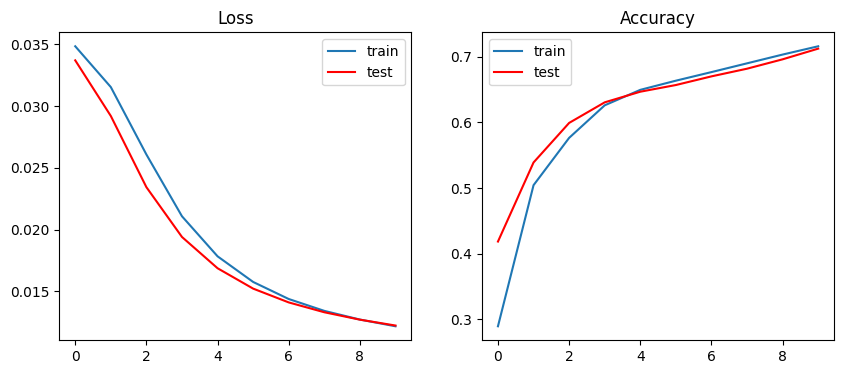

In [ ]:
plot_loss_acc(train_arr,test_arr)

#### **📌 loss와 acc는 무엇을 위해 필요한 지표인지 생각해보기**

##### **손실(loss)**

- 모델이 얼마나 잘못 예측했는지 나타내는 지표. 모델이 학습하는 동안 최소화하려고 노력함.
- 모델의 예측값 y_est와 실제 정답 y를 손실함수에 전달하여 계산함.


##### **정확도(Accuracy)**

- 모델이 얼마나 정확하게 맞췄는지 나타내는 지표. 모델의 학습이 끝난 후의 성능을 평가함.
- 모델의 예측값과 실제 값이 일치한 횟수 / 전체 케이스의 비율로 계산함.


## testset의 pred, label을 heatmap으로 시각화
---
학습한 모델의 성능을 확인하는 히트맵을 그린다.  
학습에 이용하지 않는 testset을 사용한다.

In [ ]:
preds, labels = list(), list()

with torch.no_grad():
    for batch_idx, (x,y) in enumerate(testloader):

        x,y = x.to(device), y.to(device)

        y_est = model(x)
        cost = loss(y_est, y)

        total_loss += cost.item()

        pred = torch.argmax(y_est, dim=1)

        preds.extend(list(pred.cpu().numpy()))
        labels.extend(list(y.cpu().numpy()))

test_df = pd.DataFrame({'pred' : preds, 'label' : labels})
test_df.head(10)

,pred,label
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
5,1,1
6,4,4
7,4,6
8,7,5
9,7,7


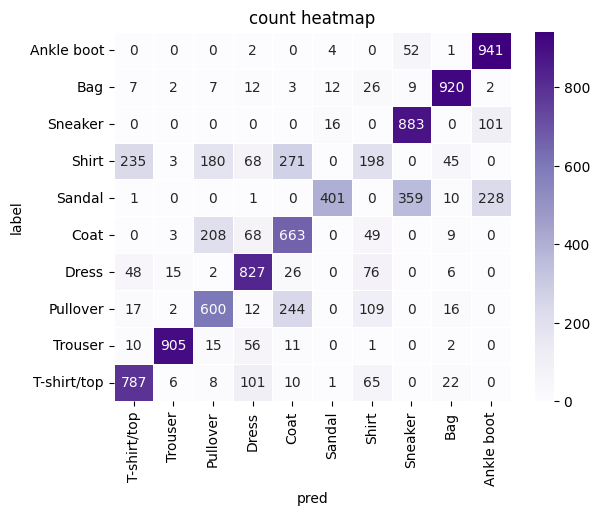

In [ ]:
# heatmap
confusion_matrix = pd.crosstab(test_df['label'], test_df['pred'])
confusion_matrix.index = classes

confusion_matrix.columns = classes
confusion_matrix = confusion_matrix.iloc[::-1,:]

sns.heatmap(confusion_matrix, cmap='Purples', annot=True, linewidth=.5, fmt=".0f")
plt.title("count heatmap")
plt.ylabel("label")
plt.xlabel("pred")
plt.show()

In [ ]:
confusion_matrix

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Ankle boot,0,0,0,2,0,4,0,52,1,941
Bag,7,2,7,12,3,12,26,9,920,2
Sneaker,0,0,0,0,0,16,0,883,0,101
Shirt,235,3,180,68,271,0,198,0,45,0
Sandal,1,0,0,1,0,401,0,359,10,228
Coat,0,3,208,68,663,0,49,0,9,0
Dress,48,15,2,827,26,0,76,0,6,0
Pullover,17,2,600,12,244,0,109,0,16,0
Trouser,10,905,15,56,11,0,1,0,2,0
T-shirt/top,787,6,8,101,10,1,65,0,22,0
